In [8]:
import numpy as np
from gym import spaces 

class BanditEnv:
    def __init__(self, n_arms=5):
        self.n_arms = n_arms
        self.true_action_values = np.random.normal(0, 1, n_arms)
        self.action_space = spaces.Discrete(n_arms)

    def reset(self):
        return None

    def step(self, action):
        reward = np.random.normal(self.true_action_values[action])
        return None, reward, False, {}

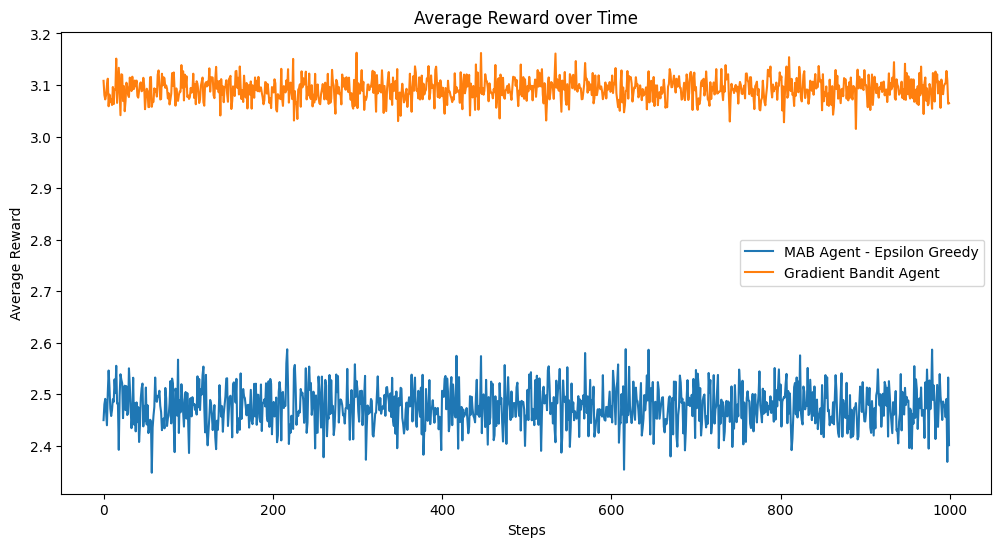

In [11]:
from BanditGradient import GradientBanditAgent, MultiArmsBanditAgent
import matplotlib.pyplot as plt

env = BanditEnv(n_arms=10)  
num_experiments = 2000
num_steps = 1000
epsilon = 0.2
alpha = 0.05
mab_agent = MultiArmsBanditAgent(env)
gb_agent = GradientBanditAgent(env, alpha)
mab_rewards = np.zeros((num_experiments, num_steps))
gb_rewards = np.zeros((num_experiments, num_steps))
for exp in range(num_experiments):
    state = env.reset()
    for step in range(num_steps):
        action_mab = mab_agent.epsilone_greedy(epsilon)
        _, reward_mab, _, _ = env.step(action_mab)  
        
        mab_agent.update(action_mab, reward_mab)
        mab_rewards[exp][step] = reward_mab
        action_gb = gb_agent.select_action()
        _, reward_gb, _, _ = env.step(action_gb)  
        
        gb_agent._update_preference(action_gb, reward_gb)
        gb_rewards[exp][step] = reward_gb
avg_mab_rewards = np.mean(mab_rewards, axis=0)
avg_gb_rewards = np.mean(gb_rewards, axis=0)
plt.figure(figsize=(12, 6))
plt.plot(avg_mab_rewards, label="MAB Agent - Epsilon Greedy")
plt.plot(avg_gb_rewards, label="Gradient Bandit Agent")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward over Time")
plt.legend()
plt.show()

